In [191]:
#Importing Libraries

import pandas as pd
import numpy as np
from functools import reduce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [192]:
#Loading data

student_info = pd.read_csv("https://raw.githubusercontent.com/jeffreyzhangma/Capstone-Project-I/master/anonymisedData/studentInfo.csv")
assessments = pd.read_csv("https://raw.githubusercontent.com/jeffreyzhangma/Capstone-Project-I/master/anonymisedData/assessments.csv")
student_assessment = pd.read_csv("https://raw.githubusercontent.com/jeffreyzhangma/Capstone-Project-I/master/anonymisedData/studentAssessment.csv")
courses = pd.read_csv("https://raw.githubusercontent.com/jeffreyzhangma/Capstone-Project-I/master/anonymisedData/courses.csv")
student_registration = pd.read_csv("https://raw.githubusercontent.com/jeffreyzhangma/Capstone-Project-I/master/anonymisedData/studentRegistration.csv")
student_vle = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentVle.csv")
vle = pd.read_csv("https://raw.githubusercontent.com/jeffreyzhangma/Capstone-Project-I/master/anonymisedData/vle.csv")


In [193]:
#Drop NA values

student_assessment.dropna(inplace=True)
student_info.dropna(inplace=True)
student_registration.dropna(inplace=True)
student_vle.dropna(inplace=True)

In [194]:
#select dataframes to combine

combined = [student_assessment, student_info, student_registration, student_vle]
combined = reduce(lambda left,right: pd.merge(left,right,on='id_student'), combined)
combined['final_result'].value_counts()

Withdrawn      16697024
Pass            6924889
Fail            2169591
Distinction     1149815
Name: final_result, dtype: int64

In [195]:
#sum the number of clicks students made

combined=combined.groupby('id_student')[['sum_click']].sum()

In [196]:
#Combine dataframes with new variable Sum_click

combined = [student_info, combined]
combined = reduce(lambda left,right: pd.merge(left,right,on='id_student'), combined)
combined['final_result'].value_counts()

Withdrawn      5295
Pass            784
Fail            557
Distinction     119
Name: final_result, dtype: int64

In [197]:
#Create Dummy Variable to isolate students that Withdrew from the course

combined['final']= np.where(combined['final_result']=='Withdrawn', 1, 0)

In [198]:
#Label Encoder to turn strings into scalars

le = preprocessing.LabelEncoder()
combined = combined.apply(le.fit_transform)



In [199]:
#One hot Encoding

enc = OneHotEncoder(sparse='True')
columns_to_encode = ['region','highest_education','imd_band','age_band','num_of_prev_attempts',]

In [200]:
def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [201]:
#one hot encoding

combined=one_hot(combined,columns_to_encode)

In [202]:
#Drop original columns since we one hot encoded them

combined = combined.drop('age_band', axis=1)

In [203]:
combined = combined.drop('gender', axis=1)

In [204]:
combined = combined.drop('region', axis=1)

In [205]:
combined = combined.drop('highest_education', axis=1)

In [206]:
combined = combined.drop('imd_band', axis=1)

In [207]:
combined = combined.drop('num_of_prev_attempts', axis=1)

In [208]:
combined = combined.drop('disability', axis=1)

In [209]:
combined.head()

,code_module,code_presentation,id_student,studied_credits,final_result,sum_click,final,region_0,region_1,region_2,...,age_band_0,age_band_1,age_band_2,num_of_prev_attempts_0,num_of_prev_attempts_1,num_of_prev_attempts_2,num_of_prev_attempts_3,num_of_prev_attempts_4,num_of_prev_attempts_5,num_of_prev_attempts_6
0,0,1,59,4,3,885,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,3,59,4,1,885,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,102,4,3,2236,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,3,102,4,2,2236,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,116,4,3,880,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [210]:
#choose subset 3 of the data based on visual graphs

is3=combined['code_presentation']==3

In [211]:
combined=combined[is3]

In [212]:
combined=combined.drop(columns="code_module")

In [213]:
combined=combined.drop(columns="code_presentation")

In [214]:
combined=combined.drop(columns="id_student")

In [215]:
combined=combined.drop(columns="final_result")

In [216]:
combinednosum=combined.drop(columns="sum_click")

In [217]:
# Decision Tree for Table with sum_click

X = combined.loc[:, combined.columns != 'final']
y = combined['final']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(xTrain, yTrain)
train_pred = dt.predict(xTrain)
test_pred = dt.predict(xTest)
print("Precision:{0:.3f}".format(metrics.precision_score(yTest, test_pred)),"\n")

Precision:0.863 



In [218]:
# Decision Tree for Table with no sum_click

X = combinednosum.loc[:, combinednosum.columns != 'final']
y = combinednosum['final']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

dt = tree.DecisionTreeClassifier(criterion='gini')
dt2 = dt.fit(xTrain, yTrain)
train_pred = dt.predict(xTrain)
test_pred = dt.predict(xTest)
print("Precision:{0:.3f}".format(metrics.precision_score(yTest, test_pred)),"\n")

Precision:0.808 



In [219]:
# Random Forest for Table with sum_click
X = combined.loc[:, combined.columns != 'final']
y = combined['final']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(xTrain, yTrain)
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)
print("Precision:{0:.3f}".format(metrics.precision_score(yTest, test_pred)),"\n")

Precision:0.852 



In [220]:
# Random Forest for Table without sum_click
X = combinednosum.loc[:, combinednosum.columns != 'final']
y = combinednosum['final']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(xTrain, yTrain)
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)
print("Precision:{0:.3f}".format(metrics.precision_score(yTest, test_pred)),"\n")

Precision:0.845 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


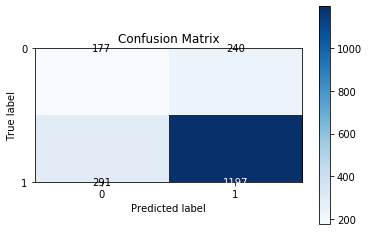

In [221]:
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(dt, xTrain, yTrain)
skplt.metrics.plot_confusion_matrix(yTrain, y_pred, normalize=False)

plt.show()

In [222]:
print("Precision:{0:.3f}".format(metrics.precision_score(yTrain, y_pred)),"\n")

Precision:0.833 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


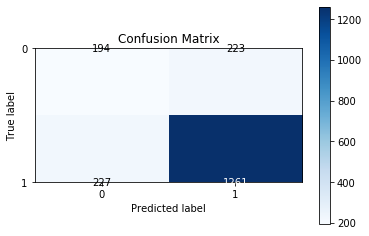

In [223]:
y_pred = cross_val_predict(rf, xTrain, yTrain)
skplt.metrics.plot_confusion_matrix(yTrain, y_pred, normalize=False)

plt.show()

In [224]:
print("Precision:{0:.3f}".format(metrics.precision_score(yTrain, y_pred)),"\n")

Precision:0.850 



The cross validated Random Forest Model had more precision than the Decision Tree model. 